<a href="https://colab.research.google.com/github/ThummalacherlaNagarjuna/Resume_Classification_ML_Project-/blob/main/resume_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('/content/Resume.csv', engine='python', on_bad_lines='skip')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [43]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [45]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to clean a single resume
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords and short words
    words = [word for word in words if word not in stop_words and len(word) > 2]

    # Join back into a single string
    return ' '.join(words)

# Apply this function to all resumes
df['cleaned_resume'] = df['Resume_str'].apply(clean_text)

# Show sample output
df[['Category', 'cleaned_resume']].head()


,Category,cleaned_resume
0,HR,administrator marketing associate administrato...
1,HR,specialist operations summary versatile media ...
2,HR,director summary years experience recruiting p...
3,HR,specialist summary dedicated driven dynamic ye...
4,HR,manager skill highlights skills department sta...


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# 1. Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# 2. Fit and transform the cleaned resume text
X = tfidf.fit_transform(df['cleaned_resume']).toarray()

# 3. Encode job category labels to numbers
le = LabelEncoder()
y = le.fit_transform(df['Category'])

# 4. Check shapes and label classes
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)
print("Label classes:", le.classes_)


Shape of features (X): (2484, 5000)
Shape of labels (y): (2484,)
Label classes: ['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 3. Predict
y_pred = model.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.7565392354124748

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.82      0.93      0.87        29
              ADVOCATE       0.92      0.77      0.84        30
           AGRICULTURE       0.60      0.38      0.46         8
               APPAREL       0.67      0.50      0.57        20
                  ARTS       0.50      0.22      0.31        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.78      0.86      0.82        21
               BANKING       0.76      0.70      0.73        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.96      0.89      0.92        27
                  CHEF       0.83      0.79      0.81        24
          CONSTRUCTION       0.94      0.91      0.93        34
            CONSULTANT       0.80      0.60      0.69        20
              DESIGNER       0.81      0.89      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
def predict_resume_category(resume_text):
    # Step 1: Clean the text using the same function
    cleaned = clean_text(resume_text)

    # Step 2: Vectorize using the same TF-IDF model
    vectorized = tfidf.transform([cleaned]).toarray()

    # Step 3: Predict using the trained model
    prediction = model.predict(vectorized)

    # Step 4: Decode label (number to class name)
    category = le.inverse_transform(prediction)[0]

    return category

# Example use:
resume_input = """
I have experience in Python, machine learning, pandas, numpy, deep learning,
and working on projects like spam detection and image classification using CNNs.
Familiar with scikit-learn, matplotlib, and TensorFlow.
"""
predicted_category = predict_resume_category(resume_input)
print("Predicted Resume Category:", predicted_category)


Predicted Resume Category: BUSINESS-DEVELOPMENT


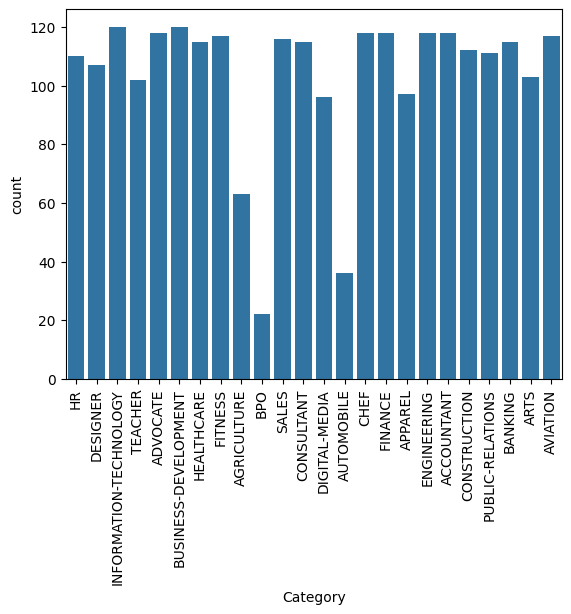

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.show()
